[[1.         0.97175451]
 [0.97175451 1.        ]]
actual Economy values of the first 5 test data:
           GSP
2006  329216.0
1995  218533.0
2010  360958.0
2017  432526.0
2012  380422.0

predicted Economy values of the first 5 test data:
[[298126.61425469]
 [234078.35898096]
 [343563.91291256]
 [441351.80712291]
 [365154.39991848]]

Coefficients:  [[0.11364012]]

Intercept:  [-277036.27751051]

Coefficient of determination (test): 0.87
Coefficient of determination (training): 0.95
Correlation value between Population and Economy
0.9761270903684467
 
Correlation value between Unemployment_rate and Economy
-0.6152745657978506
 
Correlation value between Weekly_Personal_earning and Economy
0.9910905415506722
 
correlation for Population and Personal Earning = 0.9865619565000534
correlation for Population and Unemployment Rate = -0.447476644915758
actual Economy values of the first 5 test data:
      Economy
2012   380422
2011   371607
2006   329216
2019   461248
2009   357970

predicte

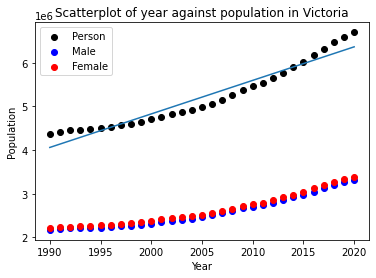

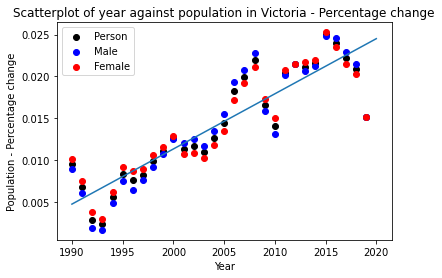

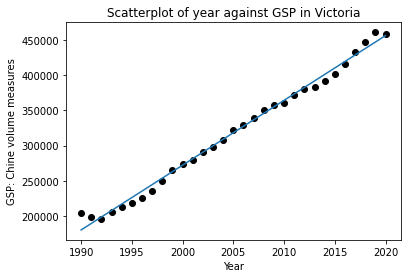

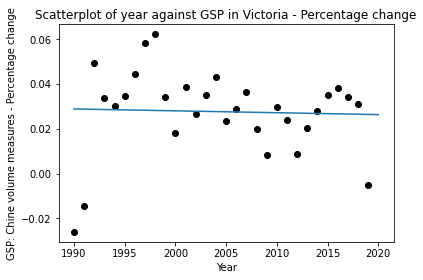

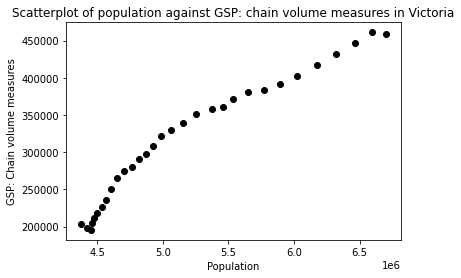

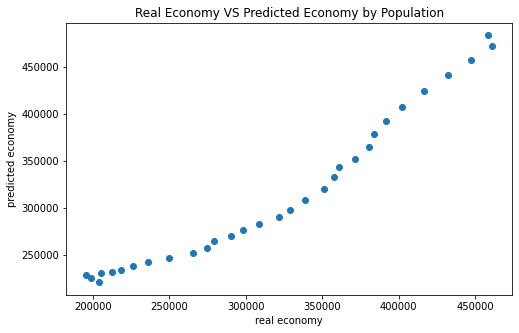

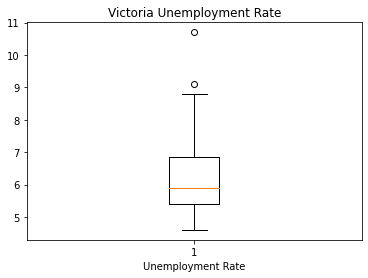

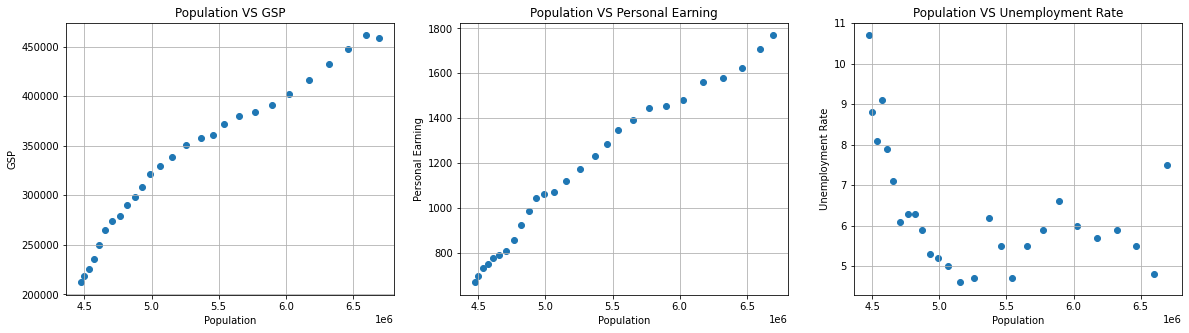

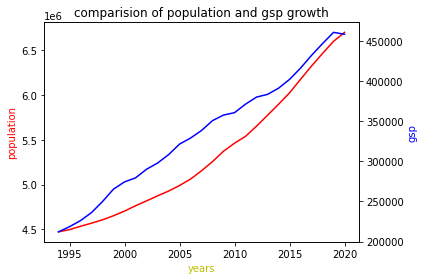

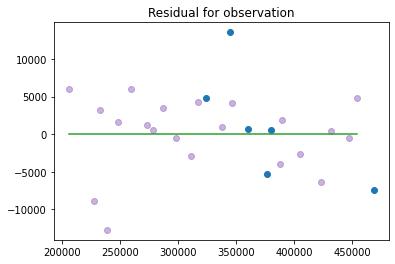

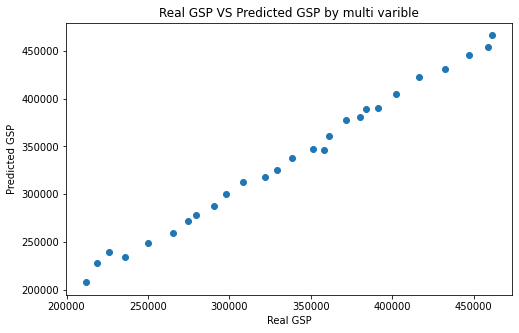

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None)

victoria_population = pd.read_csv('victoria population change.csv',encoding = 'ISO-8859-1')
victoria_economy = pd.read_csv('gross_state_product_victoria.csv',encoding = 'ISO-8859-1')

population_data = victoria_population.iloc[45:166:4] #Only obtain data in june starting from 1990
economy_data = victoria_economy.iloc[9:] #Skip useless header

# Convert data to int and float for processing
population_data_int = population_data.iloc[:, 1:4].astype(int)
economy_data_int = economy_data.iloc[:, 1:15].astype(float)
year = pd.to_datetime(economy_data.iloc[:, 0]).dt.year #Only year for simplification

# Add column: population percentage change
for i in population_data_int:
    list = []
    first = 1
    for j in population_data_int[i]:
        if first:
            new = j
        else:
            old = new
            new = j
            percentage_change = (new-old)/old
            list.append(percentage_change)
        first = 0
    list.append(0) #No percentage change in last row
    population_data_int[i + " Percentage change ;"] = list

#Add colume: GSP chain volume measures percentage change
first = 1
list = []
for j in economy_data_int['Victoria ;  Gross state product: Chain volume measures ;']:
    if first:
        new = j
    else:
        old = new
        new = j
        percentage_change = (new-old)/old
        list.append(percentage_change)
    first = 0
list.append(0) #No percentage change in last row
economy_data_int['Victoria ;  Gross state product: Chain volume measures ; Percentage change ;'] = list
x = population_data_int['Estimated Resident Population ;  Persons ;  Victoria ;']
y = economy_data_int['Victoria ;  Gross state product: Chain volume measures ;']
print(np.corrcoef(x, y))


#Year vs population
m, b = np.polyfit(year, population_data_int['Estimated Resident Population ;  Persons ;  Victoria ;'], 1)
plt.figure()
plt.scatter(year, population_data_int['Estimated Resident Population ;  Persons ;  Victoria ;'], color='black', label= "Person")
plt.scatter(year, population_data_int['Estimated Resident Population ;  Male ;  Victoria ;'], color='blue', label= "Male")
plt.scatter(year, population_data_int['Estimated Resident Population ;  Female ;  Victoria ;'], color='red', label= "Female")
plt.plot(year, m*year + b)
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.title("Scatterplot of year against population in Victoria")
plt.savefig("Year_Population")

#Year vs population - percentage change
#Note: Ignore last data (year: 2020) since percantage change cant be calculated in the last year
#      Percentage change in year 2019 is too similar for both genders, so it looks like there's only one data point
m, b = np.polyfit(year.iloc[0:30], population_data_int['Estimated Resident Population ;  Persons ;  Victoria ; Percentage change ;'].iloc[0:30], 1)
plt.figure()
plt.scatter(year.iloc[0:30], population_data_int['Estimated Resident Population ;  Persons ;  Victoria ; Percentage change ;'].iloc[0:30], color='black', label= "Person")
plt.scatter(year.iloc[0:30], population_data_int['Estimated Resident Population ;  Male ;  Victoria ; Percentage change ;'].iloc[0:30], color='blue', label= "Male")
plt.scatter(year.iloc[0:30], population_data_int['Estimated Resident Population ;  Female ;  Victoria ; Percentage change ;'].iloc[0:30], color='red', label= "Female")
plt.plot(year, m*year + b)
plt.xlabel("Year")
plt.ylabel("Population - Percentage change")
plt.legend()
plt.title("Scatterplot of year against population in Victoria - Percentage change")
plt.savefig("Year_Population_Percentage")

#Year vs gsp chain volume measures
m, b = np.polyfit(year, economy_data_int['Victoria ;  Gross state product: Chain volume measures ;'], 1)
plt.figure()
plt.scatter(year, economy_data_int['Victoria ;  Gross state product: Chain volume measures ;'], color='black')
plt.plot(year, m*year + b)
plt.xlabel("Year")
plt.ylabel("GSP: Chine volume measures")
plt.title("Scatterplot of year against GSP in Victoria")
plt.savefig("Year_GSP")

#Year vs gsp chain volume measures - percentage change

m, b = np.polyfit(year.iloc[0:30], economy_data_int['Victoria ;  Gross state product: Chain volume measures ; Percentage change ;'].iloc[0:30], 1)
plt.figure()
plt.scatter(year.iloc[0:30], economy_data_int['Victoria ;  Gross state product: Chain volume measures ; Percentage change ;'].iloc[0:30], color='black')
plt.plot(year, m*year + b)
plt.xlabel("Year")
plt.ylabel("GSP: Chine volume measures - Percentage change")
plt.title("Scatterplot of year against GSP in Victoria - Percentage change")
plt.savefig("Year_GSP_Percentage")

#Population vs gsp chain volume measures
plt.figure()
plt.scatter(population_data_int['Estimated Resident Population ;  Persons ;  Victoria ;'], economy_data_int['Victoria ;  Gross state product: Chain volume measures ;'], color='black', label= "Person")
plt.xlabel("Population")
plt.ylabel("GSP: Chain volume measures")
plt.title("Scatterplot of population against GSP: chain volume measures in Victoria")
plt.savefig("Scatterplot_Population_GSP")

new_index = []
i = 1990

while (i<=2020):
    new_index.append(i)
    i+=1

x.index = new_index
y.index = new_index

df = pd.DataFrame({'Population':x,'GSP':y})
X = df[['Population']]
y = df[['GSP']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 3)
# partial code here...
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_test_pred = lm.predict(X_test)
print('actual Economy values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted Economy values of the first 5 test data:')
print(y_test_pred[0:5])
print('')

# coefficients
print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))

from pandas import Series,DataFrame
fig4 = plt.figure(figsize=(8,5))
y_predict_multi = model.predict(X)
plt.scatter(y,y_predict_multi)
plt.xlabel('real economy')
plt.ylabel('predicted economy')
plt.title('Real Economy VS Predicted Economy by Population')
plt.savefig("Real Economy VS Predicted Economy by Population")




population = pd.read_csv('victoria population change.csv',encoding = 'ISO-8859-1')
economy = pd.read_csv('gross_state_product_victoria.csv',encoding = 'ISO-8859-1')
unemployment_rate = pd.read_csv('unemployment rate.csv',encoding = 'ISO-8859-1')
personal_earning = pd.read_csv('personal earning.csv',encoding = 'ISO-8859-1')
# Victoria Population from 1994 to 2020 
population_1994=population['Estimated Resident Population ;  Persons ;  Victoria ;'].iloc[61:166:4]

# Victoria Economy(GSP) from 1994 to 2020
economy_1994=economy['Victoria ;  Gross state product: Chain volume measures ;'].iloc[13:]

# Victoria Unemployment Rate from 1994 to 2020
unemployment_rate_1994 = unemployment_rate['Unemployment Rate (15+)  '].iloc[168::12]

# Victoria Weekly Personal Earning from 1994 to 2020
personal_earning_1994 = personal_earning['Earnings; Persons; Full Time; Adult; Total earnings ;  Victoria ;'].iloc[9::2]

population_1994.reset_index(drop=True, inplace=True)
economy_1994.reset_index(drop=True, inplace=True)
unemployment_rate_1994.reset_index(drop=True, inplace=True)
personal_earning_1994.reset_index(drop=True, inplace=True)


population_1994=population_1994.astype(int)
economy_1994=economy_1994.astype(int)
unemployment_rate_1994=unemployment_rate_1994.astype(float)
personal_earning_1994 =personal_earning_1994.astype(float)


population_GSP_cor = population_1994.corr(economy_1994)
unemployment_rate_GSP_cor = unemployment_rate_1994.corr(economy_1994)
personal_earning_GSP_cor = personal_earning_1994.corr(economy_1994)

print('Correlation value between Population and Economy')
print(population_GSP_cor)
print(' ')

print('Correlation value between Unemployment_rate and Economy')
print(unemployment_rate_GSP_cor)
print(' ')
print('Correlation value between Weekly_Personal_earning and Economy')
print(personal_earning_GSP_cor)
print(' ')



plt.figure()
plt.boxplot(unemployment_rate_1994)
plt.title('Victoria Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.savefig("Boxplot of Unemployment Rate")


# Built DataFrame 
new_index = []
i = 1994
while (i<=2020):
    new_index.append(i)
    i+=1
population_1994.index = new_index
economy_1994.index = new_index
unemployment_rate_1994.index = new_index
personal_earning_1994.index = new_index
df = pd.DataFrame({'Population':population_1994,'Unemployment Rate':unemployment_rate_1994, 
                   'Personal Earning': personal_earning_1994,'Economy':economy_1994})

# variable against GSP
fig = plt.figure(figsize =(20,5))
fig1 = plt.subplot(131)
plt.scatter(df.loc[:,'Population'],df.loc[:,'Economy'])
plt.title('Population VS GSP')
plt.xlabel("Population")
plt.ylabel("GSP")
plt.grid(True)


fig2 = plt.subplot(132)
plt.scatter(df.loc[:,'Population'],df.loc[:,'Personal Earning'])
plt.title("Population VS Personal Earning")
plt.xlabel("Population")
plt.ylabel("Personal Earning")
plt.grid(True)

fig3 = plt.subplot(133)
plt.scatter(df.loc[:,'Population'],df.loc[:,'Unemployment Rate'])
plt.title('Population VS Unemployment Rate')
plt.xlabel("Population")
plt.ylabel("Unemployment Rate")
plt.grid(True)
plt.savefig("Population Three Graph")
print("correlation for Population and Personal Earning = "+str(df.loc[:,'Population'].corr(df.loc[:,'Personal Earning'])))
print("correlation for Population and Unemployment Rate = "+str(df.loc[:,'Population'].corr(df.loc[:,'Unemployment Rate'])))

# Population & GSP with time as x-axis
ks = range(1994,2021)  
fig, ax = plt.subplots()
plt.title('comparision of population and gsp growth')
ax2 = ax.twinx()
ax.plot(ks,population_1994, color = 'r')
ax2.plot(ks,economy_1994, color = 'b')
# giving labels to the axises
ax.set_xlabel('years', color = 'y')
ax.set_ylabel('population', color = 'r')
# secondary y-axis label
ax2.set_ylabel('gsp', color = 'b')
# defining display layout 
plt.tight_layout()
plt.savefig("Population & GSP with time as x-axis")


# mutltiple regression
X = df[['Population','Unemployment Rate','Personal Earning']]
y = df[['Economy']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 3)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_test_pred = lm.predict(X_test)
print('actual Economy values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted Economy values of the first 5 test data:')
print(y_test_pred[0:5])
print('')

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

plt.figure()
plt.scatter(y_test_pred, test_residuals, color = "C0",
           label = "R2 (test) = {:.2}".format(r2_test))

plt.scatter(y_train_pred, train_residuals, color = "C4",
           label = "R2 (train) = {:.2}".format(r2_train),alpha=0.5)

plt.plot([y_train_pred.min(),y_train_pred.max()],[0,0],color = "C2")
plt.title("Residual for observation")
plt.savefig("Residual for observation")


# Predict by Population, Unemployment rate, personal_earning

X = df.drop(['Economy'],axis=1)
y = df.loc[:,'Economy']
model_multi = linear_model.LinearRegression()
model_multi.fit(X,y)
y_predict_multi = model_multi.predict(X)
MSE_multi = mean_squared_error(y,y_predict_multi)
R2_multi = r2_score(y,y_predict_multi)
print('Mean_squared_error_multi: ')
print(MSE_multi)
print(' ')

print('R2_multi: ')
print(R2_multi)
print(' ')

plt.figure(figsize=(8,5))
plt.scatter(y,y_predict_multi)
plt.xlabel('Real GSP')
plt.ylabel('Predicted GSP')
plt.title('Real GSP VS Predicted GSP by multi varible')
plt.savefig("Real GSP VS Predicted GSP by multi varible")
